In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset
df = pd.read_csv("USER_TAKEHOME.csv")

In [3]:
# Display the first few rows
display(df.head())

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
# Summary of dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


None

In [5]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values Per Column:")
print(missing_values[missing_values > 0])

Missing Values Per Column:
BIRTH_DATE     3675
STATE          4812
LANGUAGE      30508
GENDER         5892
dtype: int64


In [6]:
# Basic Statistics
display(df.describe())

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


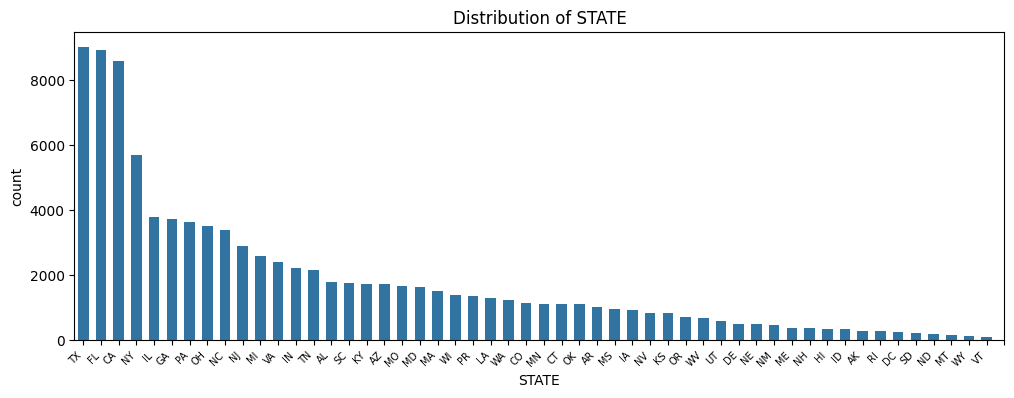

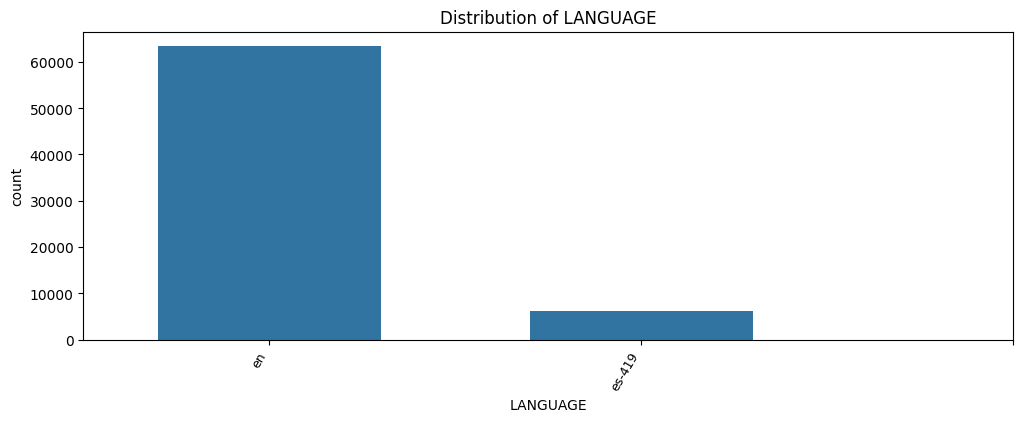

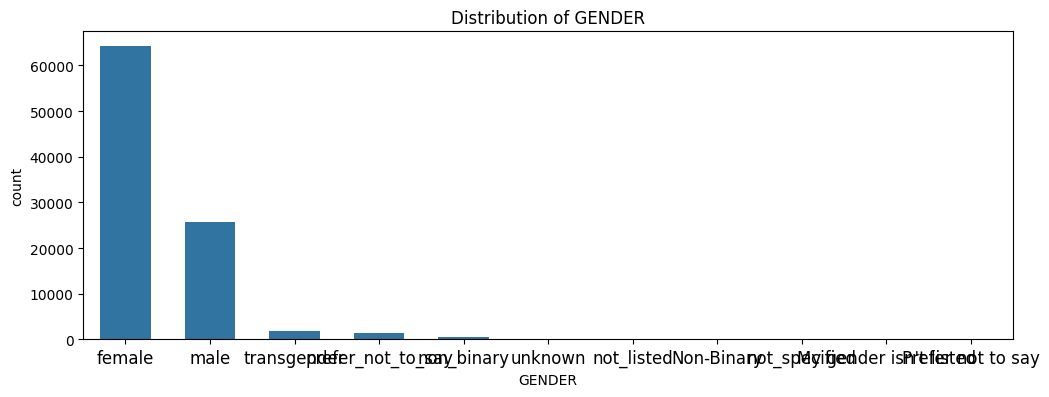

In [7]:
categorical_columns = ['STATE', 'LANGUAGE', 'GENDER']

for col in categorical_columns:
    plt.figure(figsize=(12, 4))  # Increase figure size for better spacing
    sns.countplot(x=df[col], order=df[col].value_counts().index, width=0.6)
    plt.title(f"Distribution of {col}")

    # Adjust x-axis for better readability
    if col == "STATE":
        plt.xticks(rotation=45, ha='right', fontsize=7)  # Rotate for better visibility
        plt.xticks(ticks=range(0, len(df[col].unique())))  # Show every 2nd label
    
    elif col == "LANGUAGE":
        plt.xticks(rotation=60, ha='right', fontsize=9)  # Rotate more for long language names
        plt.xticks(ticks=range(0, len(df[col].unique())))  # Show every 5th label if too many languages
    
    elif col == "GENDER":
        plt.xticks(rotation=0, fontsize=12)  # Genders are usually few, no rotation needed
    
    plt.show()


In [8]:
# Convert datetime columns to timezone-naive format
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], errors='coerce').dt.tz_localize(None)
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce').dt.tz_localize(None)

# Extracting Features from Dates
df['ACCOUNT_AGE'] = (pd.Timestamp.now() - df['CREATED_DATE']).dt.days
df['AGE'] = (pd.Timestamp.now() - df['BIRTH_DATE']).dt.days // 365

In [9]:
# Handling Missing Data
# Filling missing categorical values with 'Unknown'
for col in ['STATE', 'LANGUAGE', 'GENDER']:
    df[col] = df[col].fillna('Unknown')


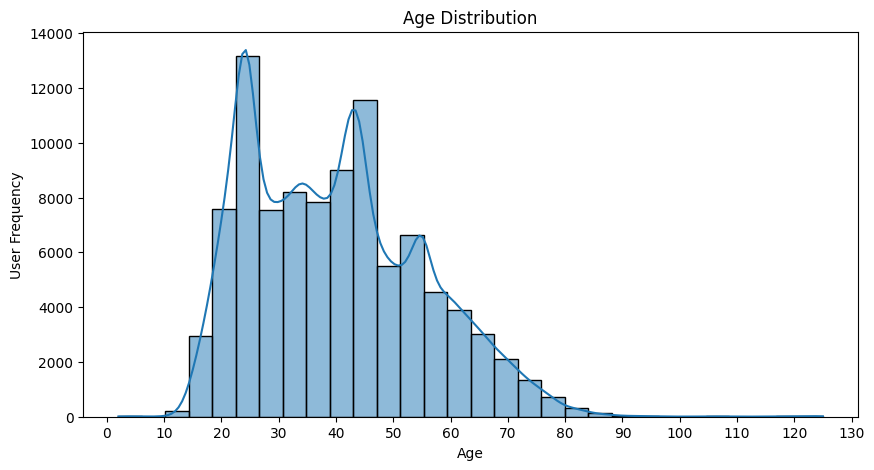

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("User Frequency")
plt.xticks(ticks=range(0, int(df['AGE'].max()) + 10, 10))
plt.show()

In [11]:
df.head(10)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,ACCOUNT_AGE,AGE
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female,1702,24.0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female,1509,23.0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female,631,30.0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,NaT,NC,en,Unknown,423,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female,482,52.0
5,5fe2b6f3ad416a1265c4ab68,2020-12-23 03:18:11,1999-10-27 04:00:00,NY,en,female,1521,25.0
6,651210546816bb4d035b1ead,2023-09-25 22:57:24,1983-09-25 22:57:25,FL,es-419,male,514,41.0
7,642831ea3d4434e63c1936fd,2023-04-01 13:30:18,1970-02-16 05:00:00,IN,en,female,691,55.0
8,63a4c9a1b5f32149b9d82f9e,2022-12-22 21:18:25,1982-12-22 05:00:00,NC,en,female,791,42.0
9,63654b21d02459d8a57a2e2c,2022-11-04 17:25:53,1992-05-03 04:00:00,NY,en,non_binary,839,32.0


In [12]:
# Final Missing Values Check
print("Final Missing Values Check:")
print(df.isnull().sum())

Final Missing Values Check:
ID                 0
CREATED_DATE       0
BIRTH_DATE      3675
STATE              0
LANGUAGE           0
GENDER             0
ACCOUNT_AGE        0
AGE             3675
dtype: int64


In [13]:
# # Saving cleaned dataset
# df.to_csv("USER_TAKEHOME_CLEANED2.csv", index=False)

In [14]:
df['CREATED_YEAR'] = df['CREATED_DATE'].dt.year
df['CREATED_MONTH'] = df['CREATED_DATE'].dt.month
df['CREATED_DAYOFWEEK'] = df['CREATED_DATE'].dt.day_name()

In [15]:
print(df['CREATED_MONTH'].describe())

count    100000.000000
mean          6.535020
std           3.426927
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: CREATED_MONTH, dtype: float64


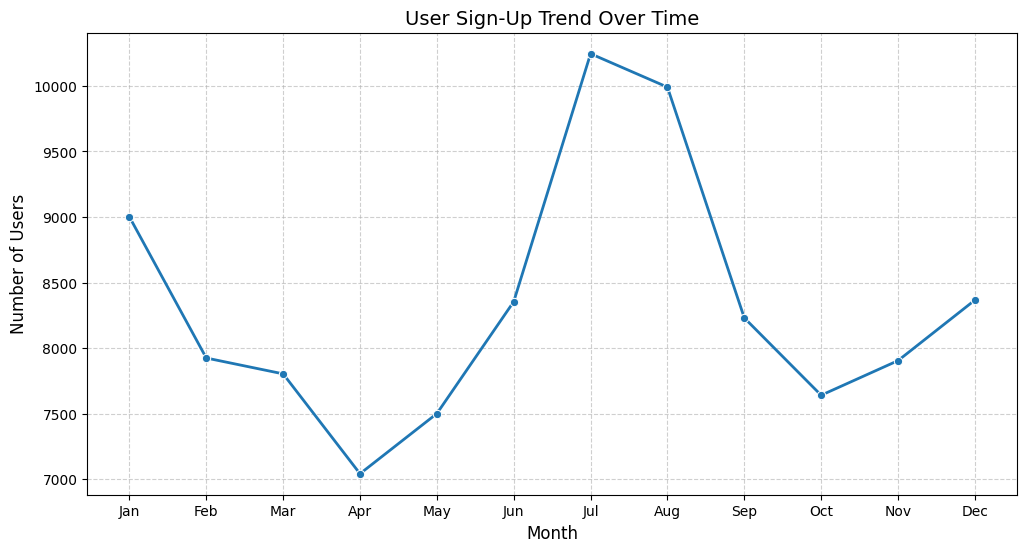

In [16]:
plt.figure(figsize=(12, 6))

# Group by CREATED_MONTH and count the number of users
monthly_signups = df['CREATED_MONTH'].value_counts().sort_index()

# Plot the line chart
sns.lineplot(x=monthly_signups.index, y=monthly_signups.values, marker="o", linewidth=2)

# Formatting the plot
plt.title("User Sign-Up Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

# Set x-axis labels for months
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

plt.grid(True, linestyle="--", alpha=0.6)  # Add grid for better readability
plt.show()


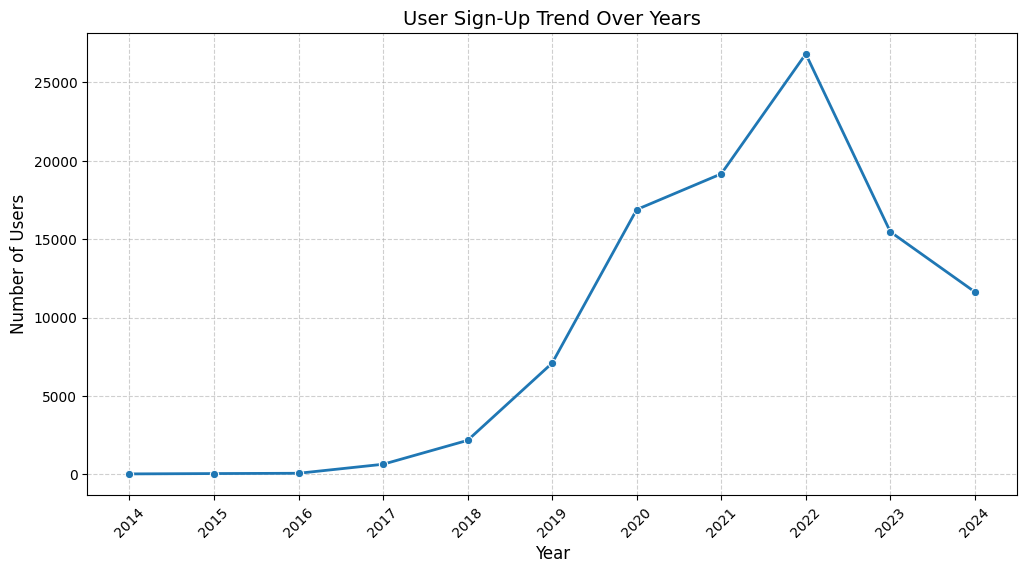

In [17]:
plt.figure(figsize=(12, 6))

# Extract year from CREATED_DATE
df['CREATED_YEAR'] = df['CREATED_DATE'].dt.year

# Group by year and count the number of users
yearly_signups = df['CREATED_YEAR'].value_counts().sort_index()

# Plot the line chart
sns.lineplot(x=yearly_signups.index, y=yearly_signups.values, marker="o", linewidth=2)

# Formatting the plot
plt.title("User Sign-Up Trend Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)

# Ensure all years appear on the x-axis
plt.xticks(ticks=yearly_signups.index, rotation=45)

plt.grid(True, linestyle="--", alpha=0.6)  # Add grid for better readability
plt.show()


In [19]:
df.shape

(100000, 11)

In [20]:
df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,ACCOUNT_AGE,AGE,CREATED_YEAR,CREATED_MONTH,CREATED_DAYOFWEEK
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54,2000-08-11 00:00:00,CA,es-419,female,1702,24.0,2020,6,Wednesday
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55,2001-09-24 04:00:00,PA,en,female,1509,23.0,2021,1,Sunday
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18,1994-10-28 00:00:00,FL,es-419,female,631,30.0,2023,5,Wednesday
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22,NaT,NC,en,Unknown,423,NaN,2023,12,Tuesday
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50,1972-03-19 00:00:00,PA,en,female,482,52.0,2023,10,Saturday


In [18]:
# # # Saving cleaned dataset
df.to_csv("Updated_Datasets/USER_CLEANED.csv", index=False)